In [80]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Load the dataset
car_mpg_dataset = pd.read_csv("A1-car-mpg.txt", header=0, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
#Clean the dataset
car_mpg_dataset.drop(columns=['Car_Model'], inplace=True)
car_mpg_dataset.dropna(inplace=True)
x = car_mpg_dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin']]
y = car_mpg_dataset[["MPG"]]

origin = car_mpg_dataset.pop('Origin')

car_mpg_dataset['USA'] = (origin == 1)*1.0
car_mpg_dataset['Europe'] = (origin == 2)*1.0
car_mpg_dataset['Japan'] = (origin == 3)*1.0

#Scale the data 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.20, shuffle=True)

Epoch 1/500
10/10 [==============================] - 1s 25ms/step - loss: 0.0807 - mae: 0.2254 - val_loss: 0.0424 - val_mae: 0.1705
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0432 - mae: 0.1741 - val_loss: 0.0432 - val_mae: 0.1723
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0429 - mae: 0.1747 - val_loss: 0.0427 - val_mae: 0.1713
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0430 - mae: 0.1742 - val_loss: 0.0431 - val_mae: 0.1724
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0429 - mae: 0.1741 - val_loss: 0.0432 - val_mae: 0.1726
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0428 - mae: 0.1737 - val_loss: 0.0430 - val_mae: 0.1721
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0428 - mae: 0.1734 - val_loss: 0.0432 - val_mae: 0.1726
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0428 - 

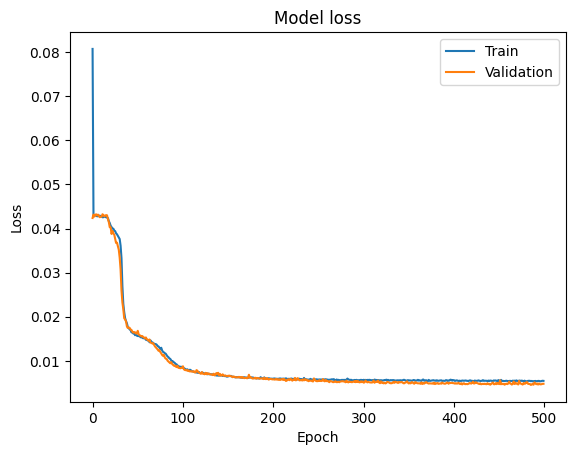

In [83]:
# Part 2: Implementation of NN
import tensorflow as tf
from matplotlib import pyplot as plt

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_shape=(x_train.shape[1],) ,activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.2)
model.compile(loss='mse', metrics=['mae'],optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


10/10 [==============================] - 0s 2ms/step
---Test---
R2 Score:  0.8864083389889567
MSE:  0.004812384944068155
MAE:  0.05370230568232254
---Train---
R2 Score:  0.8732971558148858
MSE:  0.005415772749623747
MAE:  0.054661445883793104

MAPE:  0.22148248330284523


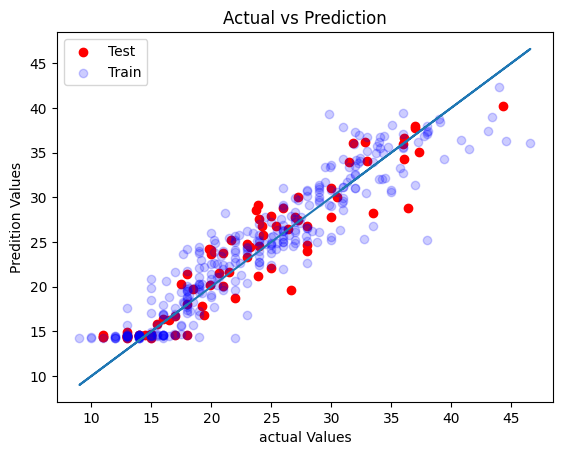

In [84]:
from sklearn.metrics import *
from matplotlib import pyplot as plt


# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y)
plt.legend()
plt.show()
